In [1]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
test_df = pd.read_csv("test.csv", encoding="utf-8")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
temp = train_df.drop(["Survived"], axis=1)
x = pd.concat([temp, test_df], axis=0, ignore_index=True)
y_train = train_df["Survived"]
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
x.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [5]:
# Step1. 補缺失值(補數值)
import json
med = x.median().drop(["PassengerId", "Pclass"])
# 如果真實在做 你應該存起來以備後續的補
med_dict = {i:med[i] for i in med.index}
with open("median.json", "w", encoding="utf-8") as f:
    json.dump(med_dict, f)
x = x.fillna(med)
x.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [6]:
# 把Name先做轉換
def getmid(s):
    return s.split(",")[-1].split(".")[0].strip()
x["Name"] = x["Name"].apply(getmid)

In [7]:
# Step1. 補完所有類別型態的缺失值
d = (x.dtypes == "object")
d = d.drop(["Ticket", "Cabin"])
labels = [i for i, b in zip(d.index, d) if b == True]
result = {}
for l in labels:
    most = x[l].value_counts().idxmax()
    result[l] = most
    x[l] = x[l].fillna(most)
with open("most_frequent.json", "w", encoding="utf-8") as f:
    json.dump(result, f)
x.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [8]:
# Step2. 類別型態 -> One-Hot Encoding
# 先把Name做一個篩選, 篩選掉出現次數太少的
x["Name"].value_counts()
def namereserved(mid):
    reserved = ["Mr", "Miss", "Mrs", "Master"]
    if mid in reserved:
        return mid
    else:
        return None
    
x["Name"] = x["Name"].apply(namereserved)
x = x.drop(["PassengerId", "Ticket", "Cabin"], axis=1)
x

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,Mr,male,22.0,1,0,7.2500,S
1,1,Mrs,female,38.0,1,0,71.2833,C
2,3,Miss,female,26.0,0,0,7.9250,S
3,1,Mrs,female,35.0,1,0,53.1000,S
4,3,Mr,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,3,Mr,male,28.0,0,0,8.0500,S
1305,1,None,female,39.0,0,0,108.9000,C
1306,3,Mr,male,38.5,0,0,7.2500,S
1307,3,Mr,male,28.0,0,0,8.0500,S


In [11]:
# pd.get_dummies(x, columns=["Pclass"])
x = pd.get_dummies(x)
x

,Pclass,Age,SibSp,Parch,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,0,1,0,0,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,28.0,0,0,8.0500,0,0,1,0,0,1,0,0,1
1305,1,39.0,0,0,108.9000,0,0,0,0,1,0,1,0,0
1306,3,38.5,0,0,7.2500,0,0,1,0,0,1,0,0,1
1307,3,28.0,0,0,8.0500,0,0,1,0,0,1,0,0,1


In [13]:
# .iloc->[一筆, 一筆, 一筆...]
x_train = x.iloc[:len(train_df)]
x_test = x.iloc[len(train_df):]
x_test

,Pclass,Age,SibSp,Parch,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
891,3,34.5,0,0,7.8292,0,0,1,0,0,1,0,1,0
892,3,47.0,1,0,7.0000,0,0,0,1,1,0,0,0,1
893,2,62.0,0,0,9.6875,0,0,1,0,0,1,0,1,0
894,3,27.0,0,0,8.6625,0,0,1,0,0,1,0,0,1
895,3,22.0,1,1,12.2875,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,28.0,0,0,8.0500,0,0,1,0,0,1,0,0,1
1305,1,39.0,0,0,108.9000,0,0,0,0,1,0,1,0,0
1306,3,38.5,0,0,7.2500,0,0,1,0,0,1,0,0,1
1307,3,28.0,0,0,8.0500,0,0,1,0,0,1,0,0,1


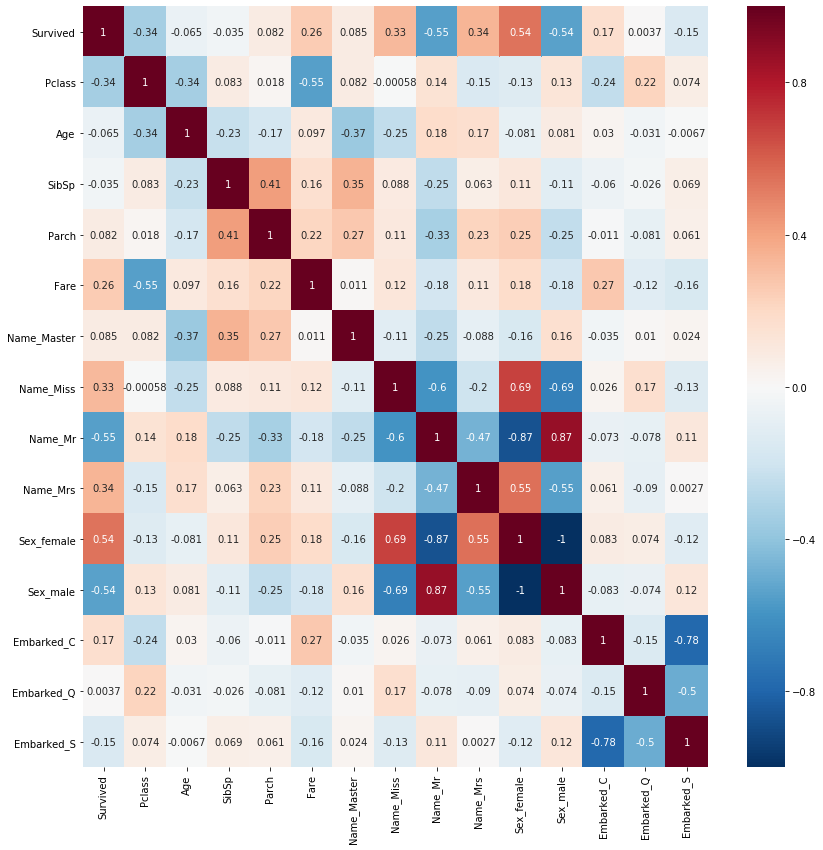

In [20]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
temp = pd.concat([y_train, x_train], axis=1)
plt.figure(figsize=(14, 14))
sns.heatmap(temp.corr(), annot=True, cmap="RdBu_r")